<a href="https://colab.research.google.com/github/Kritikargv17/Deep-Learning-LAB/blob/main/Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
file_path = "BMW_Car_Sales_Classification.csv"
df = pd.read_csv(file_path)
print(df.head())

      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  int64  
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  int64  
 3   Color                 50000 non-null  int64  
 4   Fuel_Type             50000 non-null  int64  
 5   Transmission          50000 non-null  int64  
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 4.2 MB


In [ ]:
df.describe()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,4.995240,2017.015700,2.496720,2.505340,1.51106,0.503080,3.247180,100307.203140,75034.600900,5067.514680,0.695080
std,3.175736,4.324459,1.703551,1.704039,1.11464,0.499996,1.009078,57941.509344,25998.248882,2856.767125,0.460378
min,0.000000,2010.000000,0.000000,0.000000,0.00000,0.000000,1.500000,3.000000,30000.000000,100.000000,0.000000
25%,2.000000,2013.000000,1.000000,1.000000,1.00000,0.000000,2.400000,50178.000000,52434.750000,2588.000000,0.000000
50%,5.000000,2017.000000,2.000000,3.000000,2.00000,1.000000,3.200000,100388.500000,75011.500000,5087.000000,1.000000
75%,8.000000,2021.000000,4.000000,4.000000,3.00000,1.000000,4.100000,150630.250000,97628.250000,7537.250000,1.000000
max,10.000000,2024.000000,5.000000,5.000000,3.00000,1.000000,5.000000,199996.000000,119998.000000,9999.000000,1.000000


In [ ]:
df.shape

(50000, 11)

In [ ]:
TARGET_COL = "Sales_Classification"

Epoch 1/50, Loss: 0.0348, Acc: 0.9215
Epoch 2/50, Loss: 0.0482, Acc: 0.9878
Epoch 3/50, Loss: 0.0157, Acc: 0.9916
Epoch 4/50, Loss: 0.0425, Acc: 0.9934
Epoch 5/50, Loss: 0.0153, Acc: 0.9944
Epoch 6/50, Loss: 0.0339, Acc: 0.9951
Epoch 7/50, Loss: 0.0004, Acc: 0.9961
Epoch 8/50, Loss: 0.0124, Acc: 0.9962
Epoch 9/50, Loss: 0.0091, Acc: 0.9967
Epoch 10/50, Loss: 0.0018, Acc: 0.9971
Epoch 11/50, Loss: 0.0010, Acc: 0.9974
Epoch 12/50, Loss: 0.0004, Acc: 0.9975
Epoch 13/50, Loss: 0.0136, Acc: 0.9972
Epoch 14/50, Loss: 0.0052, Acc: 0.9980
Epoch 15/50, Loss: 0.0027, Acc: 0.9976
Epoch 16/50, Loss: 0.0013, Acc: 0.9979
Epoch 17/50, Loss: 0.0007, Acc: 0.9979
Epoch 18/50, Loss: 0.0024, Acc: 0.9981
Epoch 19/50, Loss: 0.0113, Acc: 0.9979
Epoch 20/50, Loss: 0.0013, Acc: 0.9984
Epoch 21/50, Loss: 0.0017, Acc: 0.9981
Epoch 22/50, Loss: 0.0080, Acc: 0.9983
Epoch 23/50, Loss: 0.0029, Acc: 0.9983
Epoch 24/50, Loss: 0.0182, Acc: 0.9983
Epoch 25/50, Loss: 0.0005, Acc: 0.9985
Epoch 26/50, Loss: 0.0012, Acc: 0.

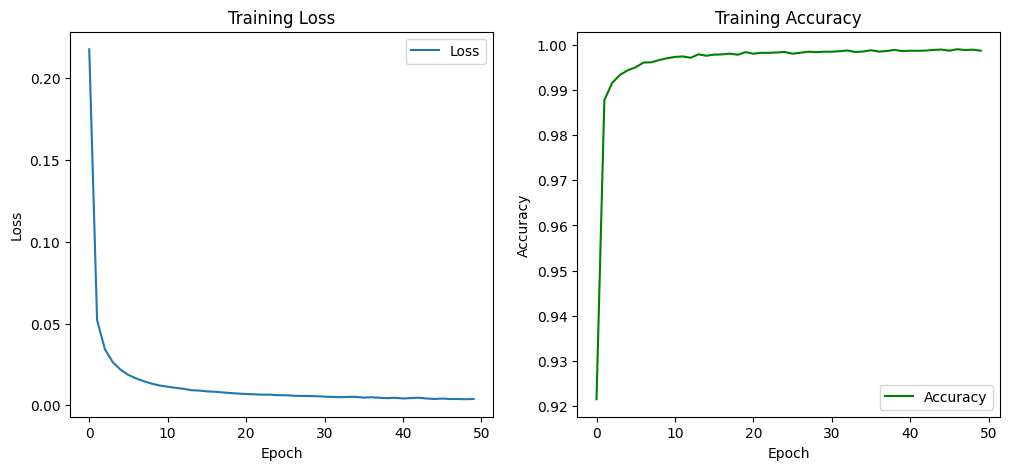

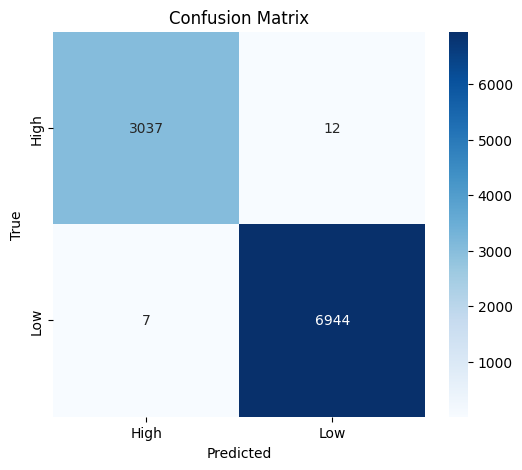

In [ ]:
# Encode categorical features
cat_cols = ["Model", "Region", "Color", "Fuel_Type", "Transmission"]
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Encode target
le_target = LabelEncoder()
df[TARGET_COL] = le_target.fit_transform(df[TARGET_COL])

# Features and target
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.long)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64, shuffle=False)

# ----------------------
# 2. Define Neural Network
# ----------------------
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = SimpleNN(input_dim=X.shape[1], hidden_dim=64, output_dim=len(le_target.classes_))

# ----------------------
# 3. Loss & Optimizer
# ----------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ----------------------
# 4. Training Loop
# ----------------------
epochs = 50
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    epoch_loss, correct, total = 0, 0, 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == batch_y).sum().item()
        total += batch_y.size(0)

    acc = correct / total
    train_losses.append(epoch_loss / len(train_loader))
    train_accuracies.append(acc)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Acc: {acc:.4f}")

# ----------------------
# 5. Evaluation on Test Set
# ----------------------
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(batch_y.numpy())
        y_pred.extend(predicted.numpy())

# Metrics
acc = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

# Sensitivity and Specificity only make sense for binary classification
if len(le_target.classes_) == 2:
    sensitivity = recall_score(y_true, y_pred, pos_label=1)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN + FP)
    print("\n--- Performance Metrics ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
else:
    print("\n--- Performance Metrics ---")
    print(f"Accuracy: {acc:.4f}")
    print("(Sensitivity/Specificity are not defined for multi-class directly)")

# ----------------------
# 6. Plots
# ----------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()